<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_13_4_Vionalplot_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try to draw your own conclusions from the **vional graphs**. Indicate, for example, in which months more bicycles are rented and consider why.

The database for the task is the **daily-bike-share** file. The data relates to the number of bikes rented depending on factors such as weather or date.

We load the database from the **csv** file:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# upload daily-bike-share data set
bike_data_raw = pd.read_csv('https://uploads.kodilla.com/bootcamp/ds/13/daily-bike-share.csv')
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
# we drop selected columns and create copy of data set
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
display(bike_data)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [4]:
# we create numeric and categorical features and assign 'rentals' to the target variable
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

In [5]:
# we drop 'atemp'feature and create new one 'difference_temp', update numeric features after that
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

,rentals,temp,difference_temp
rentals,1.000000,0.543285,-0.310423
temp,0.543285,1.000000,-0.599254
difference_temp,-0.310423,-0.599254,1.000000


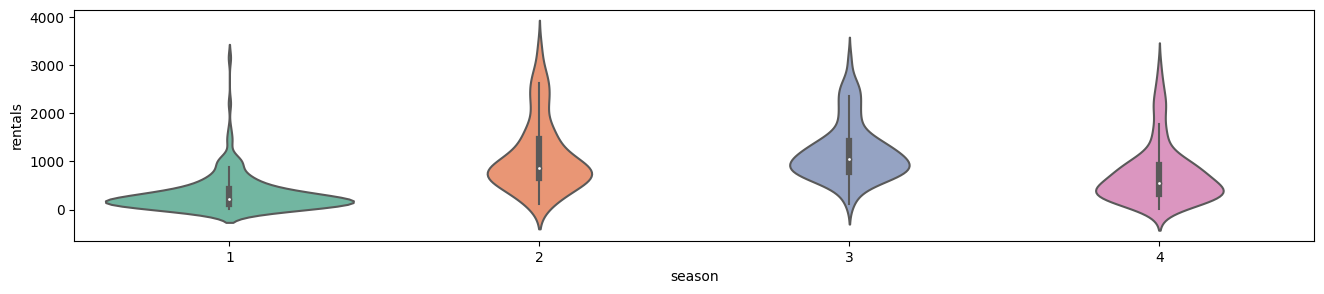

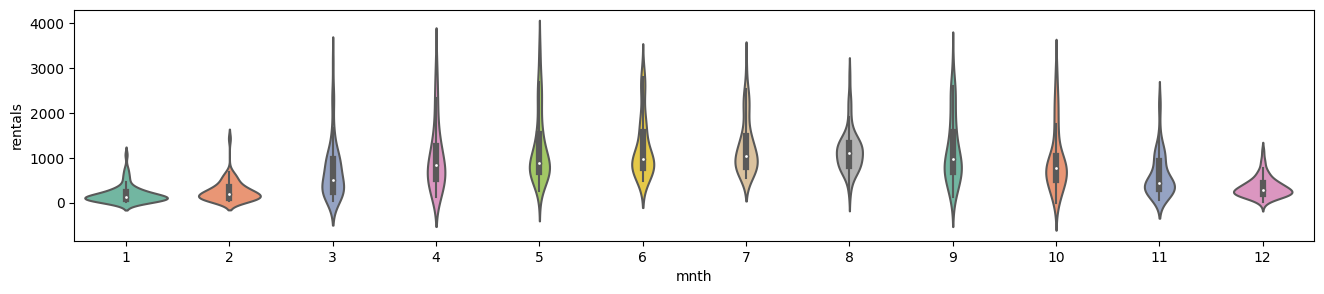

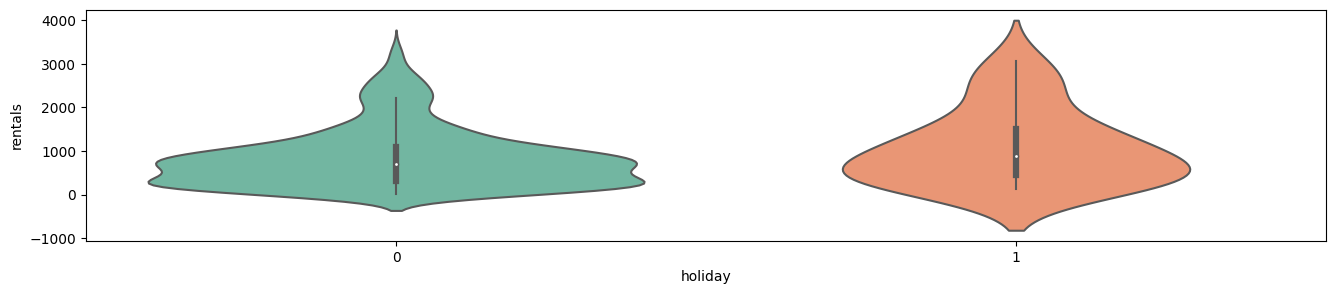

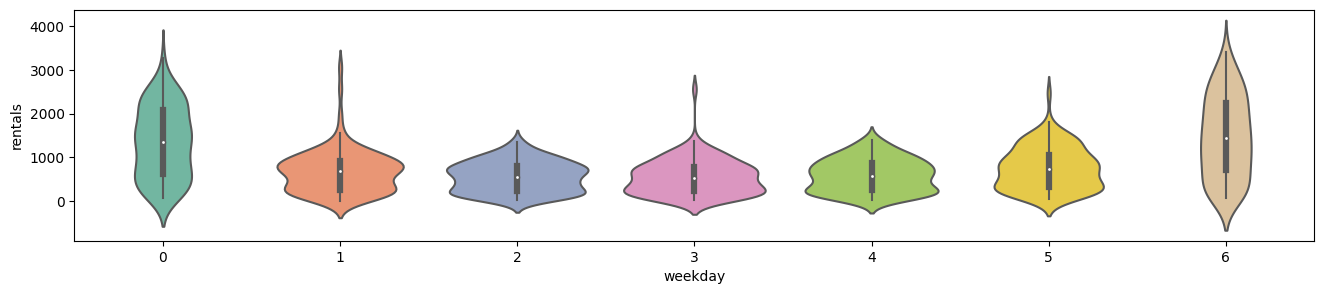

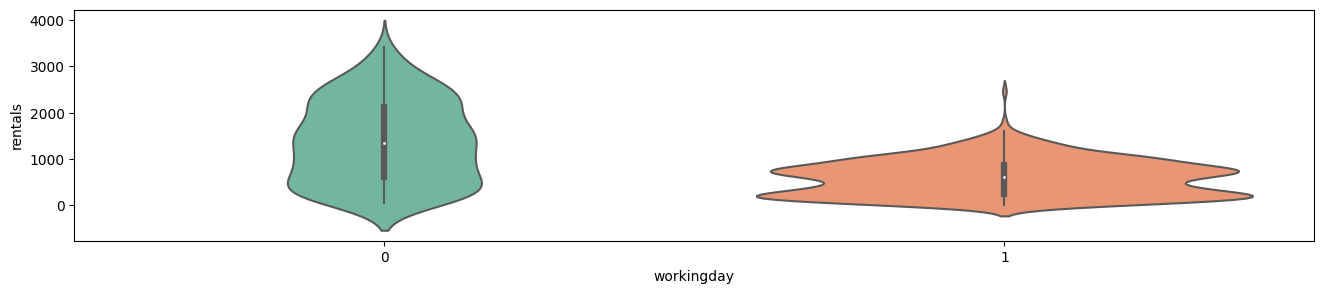

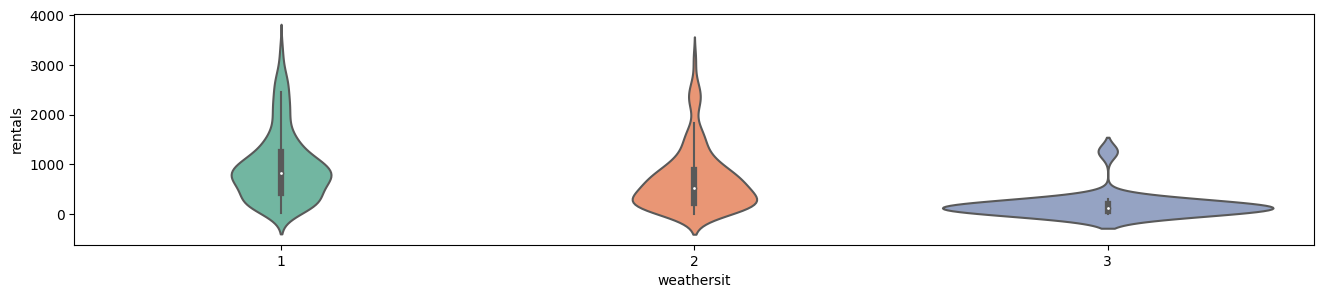

In [6]:
# we create vional plot that we will be analyzed
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

**Season** is our first feature to analyze:
1. Spring
2. Summer
3. Autumn
4. Winter

The most rented bikes we can observe in summer and autumn. This is clearly related to the temperature during this period. However, in the spring the rented bikes decrease but still there are many users who probably used them as a means of transport. The same we can see in winter.

**Month** is next our feature to analyze that allows us to better understand the data as we have more observations here. The variable is assigned to **1. January ... 12. December**.

We can see that the most rented bikes is for March, April, May and next September, October and November. Regardless of the weather and temperature then, which impact use of bikes, we can assume that people use bicycles to get to work or school. Two first and last months are winter so the weather conditions are difficult to cycling. However, there are peaople who still use this means what inform us that it is a good transport for many of them.

**Holiday** is a binary value indicating whether the observation was made on a holiday or not. This variable confirms our earlier observations. We can assume that people use bikes to rest or training during holiday while during the not holiday period it is their means of transport.

**Weekday** shows us that weekend is a time when the most bikes are rented. This is a form of reacration for bicycle users.

**Workingday** - a binary value indicating whether the day is a working day (not a weekend or a holiday) or not. The most bikes are rented during free days, this confirms observations for weekday feature.

**Weathersit** – a categorical value indicating the weather situation (1: clear, 2: fog/clouds, 3: light rain/snow, 4: heavy rain/fire/snow/fog). It is obvious that the number of rented bikes will be greater when the weather conditions are favorable for cycling.

It seems that variable connected with age of the users could help us in the further analysis and finally confirms our observations.